<a href="https://colab.research.google.com/github/shreyanshML100/Deep-Reinforcement-Learning-CS780-Assignments/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium
import pygame, math
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import warnings
import scipy.stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.5 MB/s eta 0:00:00
pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


1.1

Ques: In Gymnasium create the environment for 2-armed Bernoulli Bandit. The environment should take α
and β as input parameters and simulate 2-armed bandit accordingly.

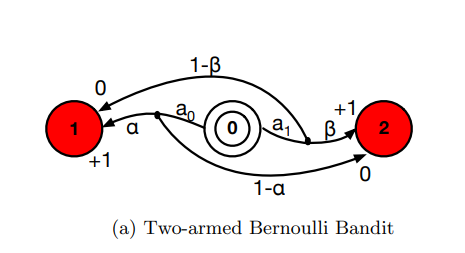



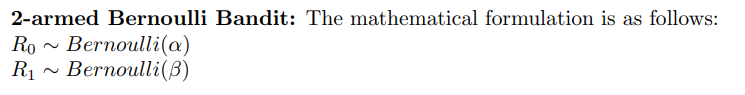

Solution: Please Find below the code for a TwoArmedBernoulliBandit()

In [2]:
class TwoArmedBernoulliBandit(Env):

    def __init__(self, alpha = 0.8, beta = 0.8, seed=69):
        self.P = {
            1: {
                0: [(1.0, 1, 0.0, True)],
                1: [(1.0, 1, 0.0, True)]
            },
            0: {
                0: [(alpha, 1, 1.0, True), (1-alpha, 2, 0.0, True)],
                1: [(beta, 2, 1.0, True), (1-beta, 1, 0.0, True)]
            },
            2: {
                0: [(1.0, 2, 0.0, True)],
                1: [(1.0, 2, 0.0, True)]
            }
        }
        self.size = 3 # The size of the 1D grid
        self.seed = seed
        self.state_space_size = 3
        self.action_space_size =2

        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.state_space_size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(self.action_space_size)


        self.alpha = alpha
        self.beta = beta

    def _get_obs(self):

        return {"agent": self._agent_location}


    def _get_info(self):
        return {
            "distance": abs(self._agent_location)
        }

    def reset(self, options=None):
        super().reset(seed=self.seed)
        self._agent_location = 0

        observation = self._get_obs()
        info = self._get_info()

        return observation, info


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        truncated = False
        observation = self._get_obs()
        info = self._get_info()

        info["log"] = {"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info

# Register the custom environment
register(id='TwoArmedBernoulliBandit-v0', entry_point=TwoArmedBernoulliBandit)


**Ques**: Once you have implemented the
environment, run it using different values of α and β to make sure it is executing as expected. For,
example, you can try with (α, β) = (0, 0), (1, 0), (0, 1), (1, 1), (0.5, 0.5), etc. Report about your test cases
and how they point towards the correct implementation. Also report about your general observations

**Solution:**
To test for the correct implementation of the we need to generate the test cases as follows:

 1. Let's take α = 0.4 and β = 0.6. Now we set the action to be taken as constant run the Bandit Simulation for a large number of times (~ 100-500). Then the average(or Expected) reward according to the given problem must tend to 0.4 if only Action 0 is taken (i.e. the left arm is pulled every time ) and 0.6 if only Action 1 is taken (i.e. the right arm is pulled every time ).

    a. For Action:0 ->   E[R<sub>0</sub>] = α
       hence For **N->∞**  => **Average Reward->α**

    b. For Action:1 ->   E[R<sub>1</sub>] = β
       hence For **N->∞**  => **Average Reward->β**

2. Let's take (α,β) = (1,0), (0,1), (0,0), (1,1) and check whether the Expected Reward is the limit of the Reward Averaged over a large number of Pulls of the arm.

3. Also in each case since there are only 2 terminal states it is a Bernoulli Distribution.



The Following code provides Testing for the **TwoArmedBernoulliBandit** Environment

In [3]:
a = float(input("Alpha = "))
b = float(input("Beta = "))
environment = make('TwoArmedBernoulliBandit-v0', alpha=a, beta=b)
observation, info = environment.reset()
sum=0;
act = int(input("Constant Action 0 or 1 := "))
n = int(input("Number of Episodes to run = "))
for _ in range(n):
    action = act
    #action = environment.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = environment.step(action)

    # print(info["log"], "\n\n")

    # if terminated:
        # print("Terminated with reward", reward,"\n\n")

    sum = sum+reward

    # sleep(2)
    if terminated or truncated:
        observation, info = environment.reset()
        # sleep(2)

print("Average Reward over ", n," actions = ", sum/n)

Alpha = 0.6
Beta = 0.4
Constant Action 0 or 1 := 1
Number of Episodes to run = 126458
Average Reward over  126458  actions =  0.4010501510382894


1.2
**Ques:**

Similarly, in Gymnasium create the environment for 10-armed Gaussian Bandit.


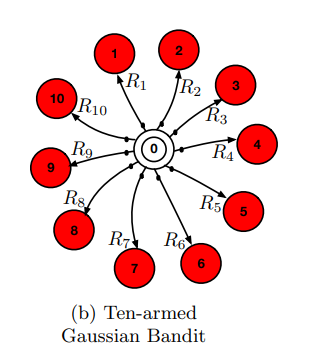



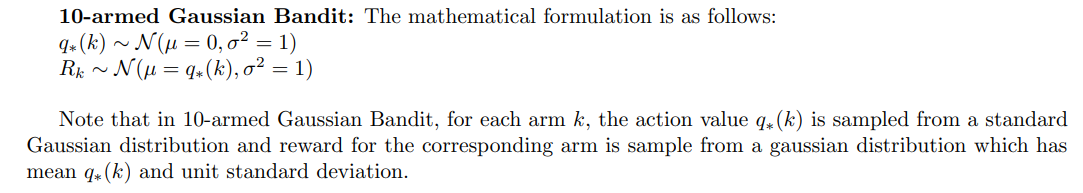




**Solution:**

The code is for **TenArmedGaussianBandit** is as  follows:


In [4]:
class TenArmedGaussianBandit(Env):

    def __init__(self, sigma=1):

        self.q = np.random.normal(0,1,10)

        self.P = {
            1: {1:[(1,1,0,True)], 2:[(1,1,0,True)], 3:[(1,1,0,True)], 4:[(1,1,0,True)], 5:[(1,1,0,True)], 6:[(1,1,0,True)], 7:[(1,1,0,True)], 8:[(1,1,0,True)], 9:[(1,1,0,True)], 10:[(1,1,0,True)]},
            2: {1:[(1,2,0,True)], 2:[(1,2,0,True)], 3:[(1,2,0,True)], 4:[(1,2,0,True)], 5:[(1,2,0,True)], 6:[(1,2,0,True)], 7:[(1,2,0,True)], 8:[(1,2,0,True)], 9:[(1,2,0,True)], 10:[(1,2,0,True)]},
            3: {1:[(1,3,0,True)], 2:[(1,3,0,True)], 3:[(1,3,0,True)], 4:[(1,3,0,True)], 5:[(1,3,0,True)], 6:[(1,3,0,True)], 7:[(1,3,0,True)], 8:[(1,3,0,True)], 9:[(1,3,0,True)], 10:[(1,3,0,True)]},
            4: {1:[(1,4,0,True)], 2:[(1,4,0,True)], 3:[(1,4,0,True)], 4:[(1,4,0,True)], 5:[(1,4,0,True)], 6:[(1,4,0,True)], 7:[(1,4,0,True)], 8:[(1,4,0,True)], 9:[(1,4,0,True)], 10:[(1,4,0,True)]},
            5: {1:[(1,5,0,True)], 2:[(1,5,0,True)], 3:[(1,5,0,True)], 4:[(1,5,0,True)], 5:[(1,5,0,True)], 6:[(1,5,0,True)], 7:[(1,5,0,True)], 8:[(1,5,0,True)], 9:[(1,5,0,True)], 10:[(1,5,0,True)]},
            6: {1:[(1,6,0,True)], 2:[(1,6,0,True)], 3:[(1,6,0,True)], 4:[(1,6,0,True)], 5:[(1,6,0,True)], 6:[(1,6,0,True)], 7:[(1,6,0,True)], 8:[(1,6,0,True)], 9:[(1,6,0,True)], 10:[(1,6,0,True)]},
            7: {1:[(1,7,0,True)], 2:[(1,7,0,True)], 3:[(1,7,0,True)], 4:[(1,7,0,True)], 5:[(1,7,0,True)], 6:[(1,7,0,True)], 7:[(1,7,0,True)], 8:[(1,7,0,True)], 9:[(1,7,0,True)], 10:[(1,7,0,True)]},
            8: {1:[(1,8,0,True)], 2:[(1,8,0,True)], 3:[(1,8,0,True)], 4:[(1,8,0,True)], 5:[(1,8,0,True)], 6:[(1,8,0,True)], 7:[(1,8,0,True)], 8:[(1,8,0,True)], 9:[(1,8,0,True)], 10:[(1,8,0,True)]},
            9: {1:[(1,9,0,True)], 2:[(1,9,0,True)], 3:[(1,9,0,True)], 4:[(1,9,0,True)], 5:[(1,9,0,True)], 6:[(1,9,0,True)], 7:[(1,9,0,True)], 8:[(1,9,0,True)], 9:[(1,9,0,True)], 10:[(1,9,0,True)]},
            10: {1:[(1,10,0,True)], 2:[(1,10,0,True)], 3:[(1,10,0,True)], 4:[(1,10,0,True)], 5:[(1,10,0,True)], 6:[(1,10,0,True)], 7:[(1,10,0,True)], 8:[(1,10,0,True)], 9:[(1,10,0,True)], 10:[(1,10,0,True)]},
            0: {1:[(1.0 ,1, np.random.normal(self.q[0],sigma,1)[0],True)],
                2:[(1.0 ,2, np.random.normal(self.q[1],sigma,1)[0],True)],
                3:[(1.0 ,3, np.random.normal(self.q[2],sigma,1)[0],True)],
                4:[(1.0 ,4, np.random.normal(self.q[3],sigma,1)[0],True)],
                5:[(1.0 ,5, np.random.normal(self.q[4],sigma,1)[0],True)],
                6:[(1.0 ,6, np.random.normal(self.q[5],sigma,1)[0],True)],
                7:[(1.0 ,7, np.random.normal(self.q[6],sigma,1)[0],True)],
                8:[(1.0 ,8, np.random.normal(self.q[7],sigma,1)[0],True)],
                9:[(1.0 ,9, np.random.normal(self.q[8],sigma,1)[0],True)],
                10:[(1.0 ,10, np.random.normal(self.q[9],sigma,1)[0],True)]}
        }
        self.size = 11 # The size of the state space

        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(self.size-1)

        self.action_space_size = 10

        self.state_space_size = 11

        self.reset()


    def _get_obs(self):

        return {"agent": self._agent_location}


    def _get_info(self):
        return {
            "agent": abs(self._agent_location)
        }

    def reset(self, seed=69, options=None):
        super().reset(seed=seed)
        self._agent_location = 0

        observation = self._get_obs()
        info = self._get_info()

        return observation, info


    def step(self, action):

        action+=1
        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities

        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        truncated = False
        observation = self._get_obs()
        info = self._get_info()

        info["log"] = {"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info

# Register the custom environment
register(id='TenArmedGaussianBandit-v0', entry_point=TenArmedGaussianBandit)


**Ques:** Make sure it is executing
as expected by creating certain test cases, e.g., by playing with σ. Report about your test cases and how
they point towards the correct implementation. Also report about your general observations.

**Solution**:



In [5]:
a = float(input("Sigma = "))
environment = make('TenArmedGaussianBandit-v0', sigma = a)
observation, info = environment.reset(seed=69)
sum=0;
#act = int(input("Constant Action 0 or 1 := "))
n = int(input("Number of Episodes to run = "))

for _ in range(n):

    action = environment.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = environment.step(action)

    # print(info["log"], "\n\n")

    # if terminated:
        # print("Terminated with reward", reward,"\n\n")

    sum = sum+reward

    # sleep(2)
    if terminated or truncated:
        observation, info = environment.reset(seed=69)
        # sleep(2)

print("Average Reward over ", n," actions = ", sum/n)

Sigma = 10
Number of Episodes to run = 1000
Average Reward over  1000  actions =  8.213634122125052


Ques 1.3  Bandit Agents:

(a).  Create a function that implements the Pure Exploitation (Greedy) strategy (the function should
have same signature as shown in the lecture). Run this for 2-armed Bernoulli Bandit to generate a
table of actions and rewards (as in the lecture) and manually verify that the strategy is working as
expected.

Solution:

In [6]:
environment = make('TwoArmedBernoulliBandit-v0', alpha=0.6, beta=0.4)

def PureExploitation(env, maxEpisodes):

  Q = np.zeros(env.action_space_size)
  N= np.zeros(env.action_space_size)
  e=0

  observation, info = env.reset()
  Q_est = np.zeros(shape= (maxEpisodes+1, env.action_space_size))
  R_arr=[]

  optimal_action = []
  sum=0


  regret_arr = []
  cum_reward = 0
  avg_reward_step = []
  cumulative_reward = []

  while e<maxEpisodes:
    a = Q.argmax()
    observation, R, terminated, truncated, info = env.step(a)

    R_arr.append(R)


    cum_reward+=R
    cumulative_reward.append(cum_reward)

    sum= sum + (1 if (np.max(Q)==Q[a]) else 0)

    N[a] += 1
    Q[a] = (Q[a]+(R-Q[a])/N[a]) if N[a]!=0 else 0

    e+=1

    if terminated or truncated:
        observation, info = env.reset()

    Q_est[e] = Q

    optimal_action.append(sum/e*100)
    avg_reward_step.append(cum_reward/e)

  regret_arr = (max(Q)-np.array(avg_reward_step))*(np.arange(1,maxEpisodes+1))


  return Q_est, R_arr, regret_arr, avg_reward_step, optimal_action


a = PureExploitation(environment, 10000)[0]
for _ in range(len(a)):
  print(_+1,"     "," ")

[[0.         0.        ]
 [1.         0.        ]
 [0.5        0.        ]
 ...
 [0.59771954 0.        ]
 [0.59765977 0.        ]
 [0.5977     0.        ]]


(b). Create a function that implements the Pure Exploration strategy (the function should have same
signature as shown in the lecture). Run this for for 2-armed Bernoulli Bandit to generate a table of
actions and rewards (as in the lecture) and manually verify that the strategy is working as expected.

In [16]:
environment = make('TwoArmedBernoulliBandit-v0', alpha=0.6, beta=0.4)
observation, info = environment.reset()

def PureExploration(env, maxEpisodes):
  Q = np.zeros(env.action_space_size)
  N = np.zeros(env.action_space_size)

  observation, info = env.reset()

  Q_est = np.zeros(shape=(maxEpisodes+1, env.action_space_size))
  e=0
  R_arr=[]
  optimal_action = []
  sum=0

  regret_arr = []
  cum_reward = 0
  avg_reward_step = []
  cumulative_reward = []

  while e<maxEpisodes:
    a = random.randint(0,len(Q)-1)
    observation, R, terminated, truncated, info = env.step(a)

    R_arr.append(R)

    sum= sum + (1 if (np.max(Q)==Q[a]) else 0)

    N[a]+=1
    Q[a] = (Q[a]+(R-Q[a])/N[a]) if N[a]!=0 else 0

    if terminated or truncated:
        observation, info = env.reset()

    cum_reward+=R
    cumulative_reward.append(cum_reward)

    e = e + 1
    Q_est[e] = Q

    optimal_action.append(sum/e*100)
    avg_reward_step.append(cum_reward/e)

  regret_arr = (max(Q)-np.array(avg_reward_step))*(np.arange(1,maxEpisodes+1))

  return Q_est, R_arr, regret_arr, avg_reward_step, optimal_action


print(PureExploration(environment, 1000)[0])

[[0.         0.        ]
 [0.         1.        ]
 [1.         1.        ]
 ...
 [0.59108527 0.41701245]
 [0.59187621 0.41701245]
 [0.59187621 0.41821946]]


(c). Create a function that implements the ϵ-Greedy strategy (the function should have same signature
as shown in the lecture). Run this for 2-armed Bernoulli Bandit with different values of ϵ, ranging
from small to large values. Verify that your implementation is working.

(d). Create a function that implements the decaying ϵ-Greedy strategy (the function should have same signature as shown in the lecture). You can try two different versions of decay: linear and exponential. Start with the value of 1.0 for epsilon and decay it linearly/exponentially with predefined rate to 0.0. You can try with different rates of decays. The type of decay and the final decay rate are input parameters to the function, include these in the function definition.

In [11]:
def linearly_decaying_epsilon(initial_epsilon=1.0, decay_period=100000, min_epsilon=0.001):

    def epsilon_value(step):
        slope = (initial_epsilon - min_epsilon) / decay_period
        return max(min_epsilon, initial_epsilon - step * slope)

    return epsilon_value

def exponentially_decaying_epsilon(initial_epsilon = 1.0, decay_factor = 0.95):

    def epsilon_value(step):
      return (decay_factor**(step))*initial_epsilon

    return epsilon_value

In [12]:
def EpsilonGreedy(env, maxEpisodes, epsilon, decayType=None, decay_rate=0.99, minimum_epsilon=0):
  Q = np.zeros(env.action_space_size)
  N = np.zeros(env.action_space_size)
  e = 0
  Q_est = np.zeros(shape = (maxEpisodes+1, env.action_space_size))

  observation, info = env.reset()

  if decayType == "exponential":
    epsilon = exponentially_decaying_epsilon(epsilon, decay_rate)
  elif decayType == "linear":
    epsilon = linearly_decaying_epsilon(epsilon, maxEpisodes, minimum_epsilon)
  else:
    decayType=None
    epsilon=epsilon

  R_arr = []

  action=[]

  optimal_action = []
  sum=0

  regret_arr = []
  cum_reward = 0
  avg_reward_step = []
  cumulative_reward = []

  while e<maxEpisodes:
    if decayType==None and random.random()>epsilon or decayType!=None and random.random()>epsilon(e):
      a = Q.argmax()
    else:
      a = random.randint(0, len(Q)-1)

    action.append(a)

    sum= sum + (1 if (np.max(Q)==Q[a]) else 0)

    observation, R, terminated, truncated, info = env.step(a)

    cum_reward+=R
    cumulative_reward.append(cum_reward)

    R_arr.append(R)

    if terminated or truncated:
        observation, info = env.reset()

    N[a]+=1
    Q[a] = Q[a]+(R-Q[a])/N[a] if N[a]!=0 else 0
    e=e+1
    Q_est[e] = Q

    optimal_action.append(sum/e*100)
    avg_reward_step.append(cum_reward/e)

  regret_arr = (max(Q)-np.array(avg_reward_step))*(np.arange(1,maxEpisodes+1))

  return Q_est, R_arr, regret_arr, avg_reward_step, optimal_action

print(EpsilonGreedy(environment, 100000, epsilon=0.1, decayType = "linear")[0])

[[0.         0.        ]
 [0.         0.        ]
 [1.         0.        ]
 ...
 [0.60171306 0.40167015]
 [0.6017069  0.40167015]
 [0.60171098 0.40167015]]


(e)  Create a function that implements the Softmax strategy (the function should have same signature
as shown in the lecture). You would have to play with the initial temperature parameter. For
example, you start with initial temperature of 100 and decay it linearly to 0.01 or you start with
initial temperature of ∞ and decay it linearly to 0.005, etc.


In [17]:
def SoftmaxFun(arr):
  prob = np.zeros(len(arr))
  sum=0;
  for _ in range(len(prob)):
    prob[_] = np.exp(arr[_])
    sum = sum + prob[_]
  prob = prob/sum

  return prob


def Softmax(env, maxEpisodes=100, tau=1, decayRate=1):
  Q = np.zeros(env.action_space_size)
  N = np.zeros(env.action_space_size)
  A = np.arange(env.action_space_size)
  e=0
  observation, info = env.reset()
  Q_est = np.zeros(shape=(maxEpisodes+1, env.action_space_size))
  R_arr = []

  action = []

  sum=0
  optimal_action = []

  regret_arr = []
  cum_reward = 0
  avg_reward_step = []
  cumulative_reward = []

  while e<maxEpisodes:
    probs = SoftmaxFun(Q/tau)
    a = np.random.choice(np.ndarray.tolist(A), size=1, p=probs)[0]
    #print(probs)
    action.append(a)

    sum= sum + (1 if (np.max(Q)==Q[a]) else 0)

    observation, R, terminated, truncated, info = env.step(a)

    cum_reward+=R
    cumulative_reward.append(cum_reward)

    R_arr.append(R)
    N[a]+=1
    Q[a] = (Q[a] + (R-Q[a])/N[a]) if N[a]!=0 else 0

    if terminated or truncated:
        observation, info = env.reset()

    tau = tau*decayRate
    e=e+1
    Q_est[e] = Q

    optimal_action.append(sum/e*100)
    avg_reward_step.append(cum_reward/e)

  regret_arr = (max(Q)-np.array(avg_reward_step))*(np.arange(1,maxEpisodes+1))

  return Q_est, R_arr, regret_arr, avg_reward_step, optimal_action

print(Softmax(environment, 50000, 100)[0])

[[0.         0.        ]
 [0.         0.        ]
 [1.         0.        ]
 ...
 [0.59974327 0.4002553 ]
 [0.59974327 0.40023933]
 [0.59971921 0.40023933]]


(f) Create a function that implements the UCB strategy (the function should have same signature
as shown in the lecture). You would have to play with the c parameter. For example, you can try
c = 0.2, c = 0.5, etc.


In [18]:
def UCB(env, maxEpisodes=100, c=0.2):
  Q = np.zeros(env.action_space_size)
  N = np.zeros(env.action_space_size)
  e=0
  observation, info = env.reset()
  Q_est = np.zeros(shape=(maxEpisodes+1, env.action_space_size))
  R_arr = []
  optimal_action = []
  sum=0

  regret_arr = []
  cum_reward = 0
  avg_reward_step = []
  cumulative_reward = []
  while e<maxEpisodes:
    if e<len(Q):
      a=e
    else:
      U=c*np.sqrt(math.log(e)/N)
      a = (Q+U).argmax()

    observation, R, terminated, truncated, info = env.step(a)

    cum_reward+=R

    cumulative_reward.append(cum_reward)

    if max(Q) == Q[a]:
      sum+=1

    R_arr.append(R)
    N[a]+=1
    Q[a] = (Q[a] + (R-Q[a])/N[a]) if N[a]!=0 else 0

    if terminated or truncated:
        observation, info = env.reset()

    e=e+1

    Q_est[e] = Q

    avg_reward_step.append(cum_reward/e)
    optimal_action.append(sum/e*100)

  regret_arr = (max(Q)-np.array(avg_reward_step))*(np.arange(1,maxEpisodes+1))

  return Q_est, R_arr, regret_arr, avg_reward_step, optimal_action

print(UCB(environment, maxEpisodes=100000, c=0.6)[0])

[[0.         0.        ]
 [0.         0.        ]
 [0.         1.        ]
 ...
 [0.59950371 0.33333333]
 [0.59949771 0.33333333]
 [0.59950172 0.33333333]]


1.4

Create 50 different 2-armed Bernoulli Bandit environments by sampling different values of α and β from
a standard uniform distribution (U(0, 1)). Run each of the agents above (6 in total) for 1000 time-steps
(this is one run) for each instance of the environment. At each time step record the received reward. For
a given agent, at each time step, average out the rewards over 50 instances of the environment. Draw a
plot (e.g., using Matplotlib) of average rewards received vs. time step. Do this for all agents and plot it
in the same plot. Now you can compare different agents (i.e., different strategies). Since different agents
have different hyper-parameters, play with different settings and you can generate multiple different plots so as to aid comparison. Analyze the plots, write about your key observations, e.g., what strategy works
better, what settings for a strategy works better, what your findings about the agents, etc.



In [19]:
environments = []
n=100
for i in range(n):
  environments.append(make('TwoArmedBernoulliBandit-v0', alpha=random.uniform(0,1), beta=random.uniform(0,1)))

max_time_steps = 1000
max_episodes = 1

R1=np.zeros(shape=(n, max_time_steps))
R2=np.zeros(shape=(n, max_time_steps))
R3=np.zeros(shape=(n, max_time_steps))
R4=np.zeros(shape=(n, max_time_steps))
R5=np.zeros(shape=(n, max_time_steps))
R6=np.zeros(shape=(n, max_time_steps))


OA1=np.zeros(shape=(n, max_time_steps))
OA2=np.zeros(shape=(n, max_time_steps))
OA3=np.zeros(shape=(n, max_time_steps))
OA4=np.zeros(shape=(n, max_time_steps))
OA5=np.zeros(shape=(n, max_time_steps))
OA6=np.zeros(shape=(n, max_time_steps))

regret1 = np.zeros(shape=(n,max_time_steps))
regret2 = np.zeros(shape=(n,max_time_steps))
regret3 = np.zeros(shape=(n,max_time_steps))
regret4 = np.zeros(shape=(n,max_time_steps))
regret5 = np.zeros(shape=(n,max_time_steps))
regret6 = np.zeros(shape=(n,max_time_steps))

avgr1 = np.zeros(shape=(n,max_time_steps))
avgr2 = np.zeros(shape=(n,max_time_steps))
avgr3 = np.zeros(shape=(n,max_time_steps))
avgr4 = np.zeros(shape=(n,max_time_steps))
avgr5 = np.zeros(shape=(n,max_time_steps))
avgr6 = np.zeros(shape=(n,max_time_steps))

for i in range(n):

  for j in range(max_episodes):
    r1 = PureExploitation(environments[i], max_time_steps)
    r2 = PureExploration(environments[i], max_time_steps)
    r3 = EpsilonGreedy(environments[i], max_time_steps, epsilon = 0.3)
    r4 = EpsilonGreedy(environments[i], max_time_steps, epsilon = 0.3, decayType = "exponential", decay_rate=0.7)
    r5 = Softmax(environments[i], max_time_steps, tau = 0.01)
    r6 = UCB(environments[i],  max_time_steps, c=0.8)

    R1[i] = R1[i] + np.array(r1[1])
    R2[i] = R2[i] + np.array(r2[1])
    R3[i] = R3[i] + np.array(r3[1])
    R4[i] = R4[i] + np.array(r4[1])
    R5[i] = R5[i] + np.array(r5[1])
    R6[i] = R6[i] + np.array(r6[1])

    regret1[i,:] = regret1[i,:] + np.array(r1[2])
    regret2[i,:] = regret2[i,:] + np.array(r2[2])
    regret3[i,:] = regret3[i,:] + np.array(r3[2])
    regret4[i,:] = regret4[i,:] + np.array(r4[2])
    regret5[i,:] = regret5[i,:] + np.array(r5[2])
    regret6[i,:] = regret6[i,:] + np.array(r6[2])

    avgr1[i,:] = avgr1[i,:] + np.array(r1[3])
    avgr2[i,:] = avgr2[i,:] + np.array(r2[3])
    avgr3[i,:] = avgr3[i,:] + np.array(r3[3])
    avgr4[i,:] = avgr4[i,:] + np.array(r4[3])
    avgr5[i,:] = avgr5[i,:] + np.array(r5[3])
    avgr6[i,:] = avgr6[i,:] + np.array(r6[3])

    OA1[i,:] = OA1[i,:] + np.array(r1[4])
    OA2[i,:] = OA2[i,:] + np.array(r2[4])
    OA3[i,:] = OA3[i,:] + np.array(r3[4])
    OA4[i,:] = OA4[i,:] + np.array(r4[4])
    OA5[i,:] = OA5[i,:] + np.array(r5[4])
    OA6[i,:] = OA6[i,:] + np.array(r6[4])


R1 = np.mean(R1, axis=0)/max_episodes
R2 = np.mean(R2, axis=0)/max_episodes
R3 = np.mean(R3, axis=0)/max_episodes
R4 = np.mean(R4, axis=0)/max_episodes
R5 = np.mean(R5, axis=0)/max_episodes
R6 = np.mean(R6, axis=0)/max_episodes

regret1 = np.mean(regret1, axis=0)/max_episodes
regret2 = np.mean(regret2, axis=0)/max_episodes
regret3 = np.mean(regret3, axis=0)/max_episodes
regret4 = np.mean(regret4, axis=0)/max_episodes
regret5 = np.mean(regret5, axis=0)/max_episodes
regret6 = np.mean(regret6, axis=0)/max_episodes

avgr1 = np.mean(avgr1, axis=0)/max_episodes
avgr2 = np.mean(avgr2, axis=0)/max_episodes
avgr3 = np.mean(avgr3, axis=0)/max_episodes
avgr4 = np.mean(avgr4, axis=0)/max_episodes
avgr5 = np.mean(avgr5, axis=0)/max_episodes
avgr6 = np.mean(avgr6, axis=0)/max_episodes

OA1 = np.mean(OA1, axis=0)/max_episodes
OA2 = np.mean(OA2, axis=0)/max_episodes
OA3 = np.mean(OA3, axis=0)/max_episodes
OA4 = np.mean(OA4, axis=0)/max_episodes
OA5 = np.mean(OA5, axis=0)/max_episodes
OA6 = np.mean(OA6, axis=0)/max_episodes

T = np.arange(max_time_steps)


Plots for 1.4

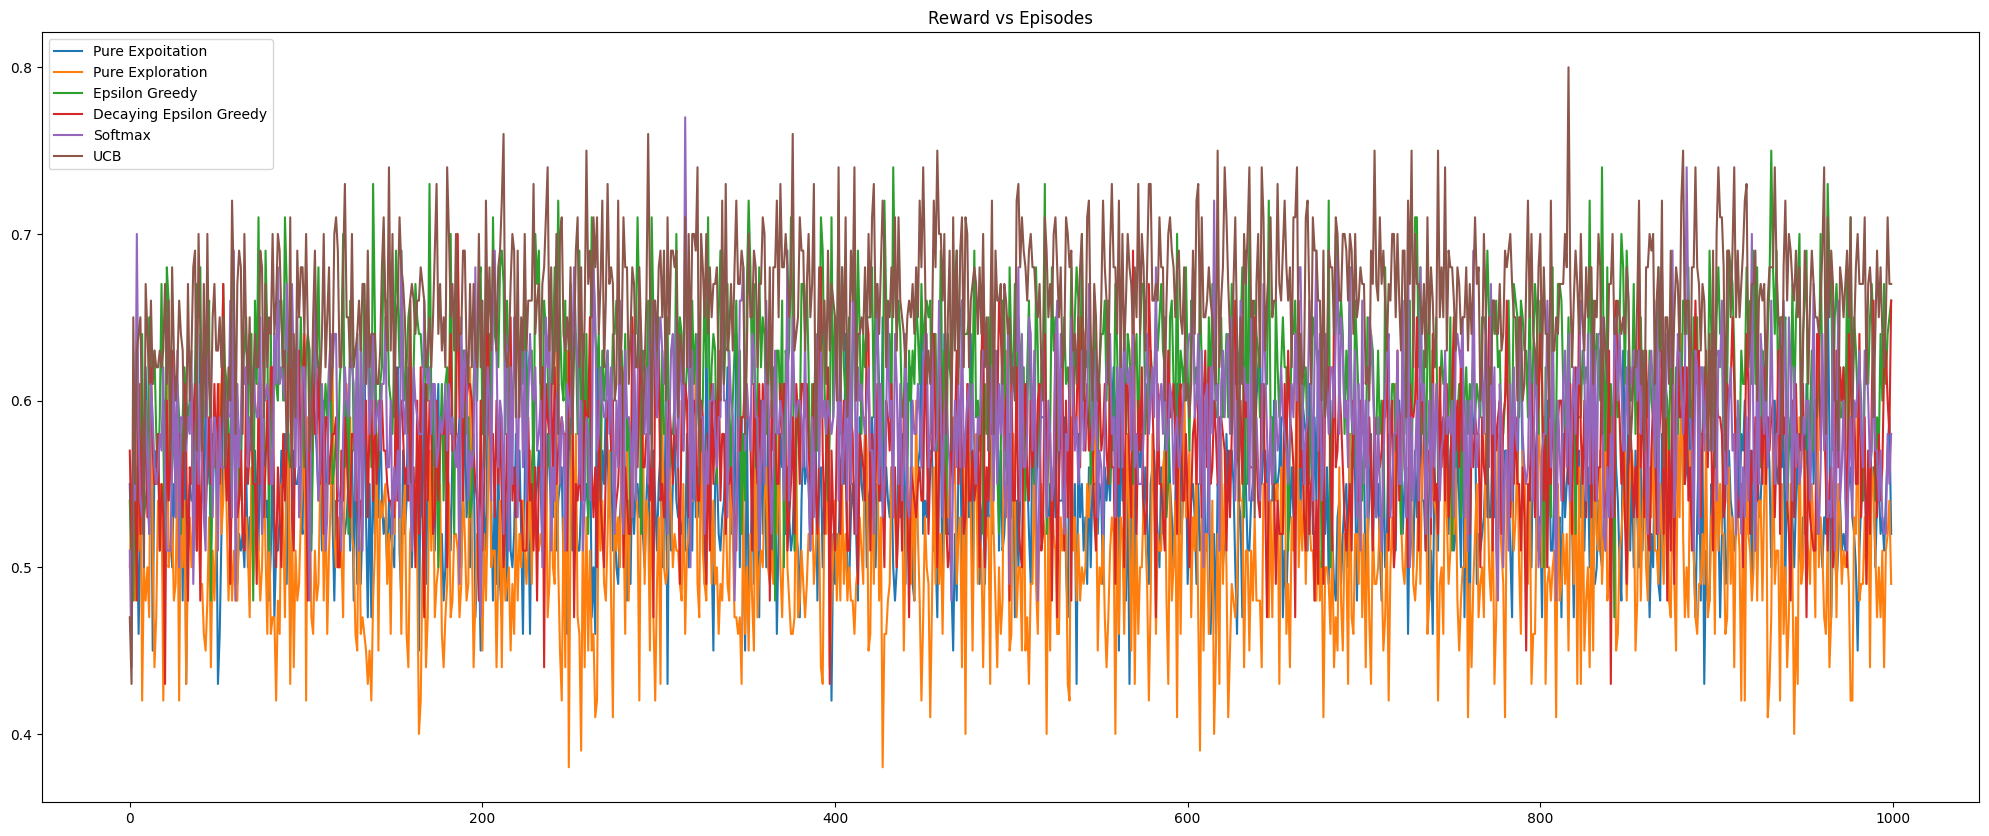

In [20]:
plt.figure(figsize=(25,10))

plt.plot(T, R1, label = 'Pure Expoitation')
plt.plot(T, R2, label = "Pure Exploration")
plt.plot(T, R3, label = "Epsilon Greedy")
plt.plot(T, R4, label = "Decaying Epsilon Greedy")
plt.plot(T, R5, label = "Softmax")
plt.plot(T, R6, label = "UCB")
plt.title("Reward vs Episodes")

plt.legend()

plt.show()

1.6

In the lecture we defined Regret as ∑<sup>E</sup><sub>e=1</sub> E[v* − q*(A<sub>e</sub>)], i.e. episode wise sum of the expected value of the
difference between optimal action value (v∗) and true value (q∗) of taking an action A<sub>e</sub>. For the 2-armed
Bernoulli Bandit plot the regret vs episodes for each of the agent. Use the same setting of 50 environment
instances as in the previous part. What do you observe? How do regrets evolve for different methods?
Describe your observations in details.

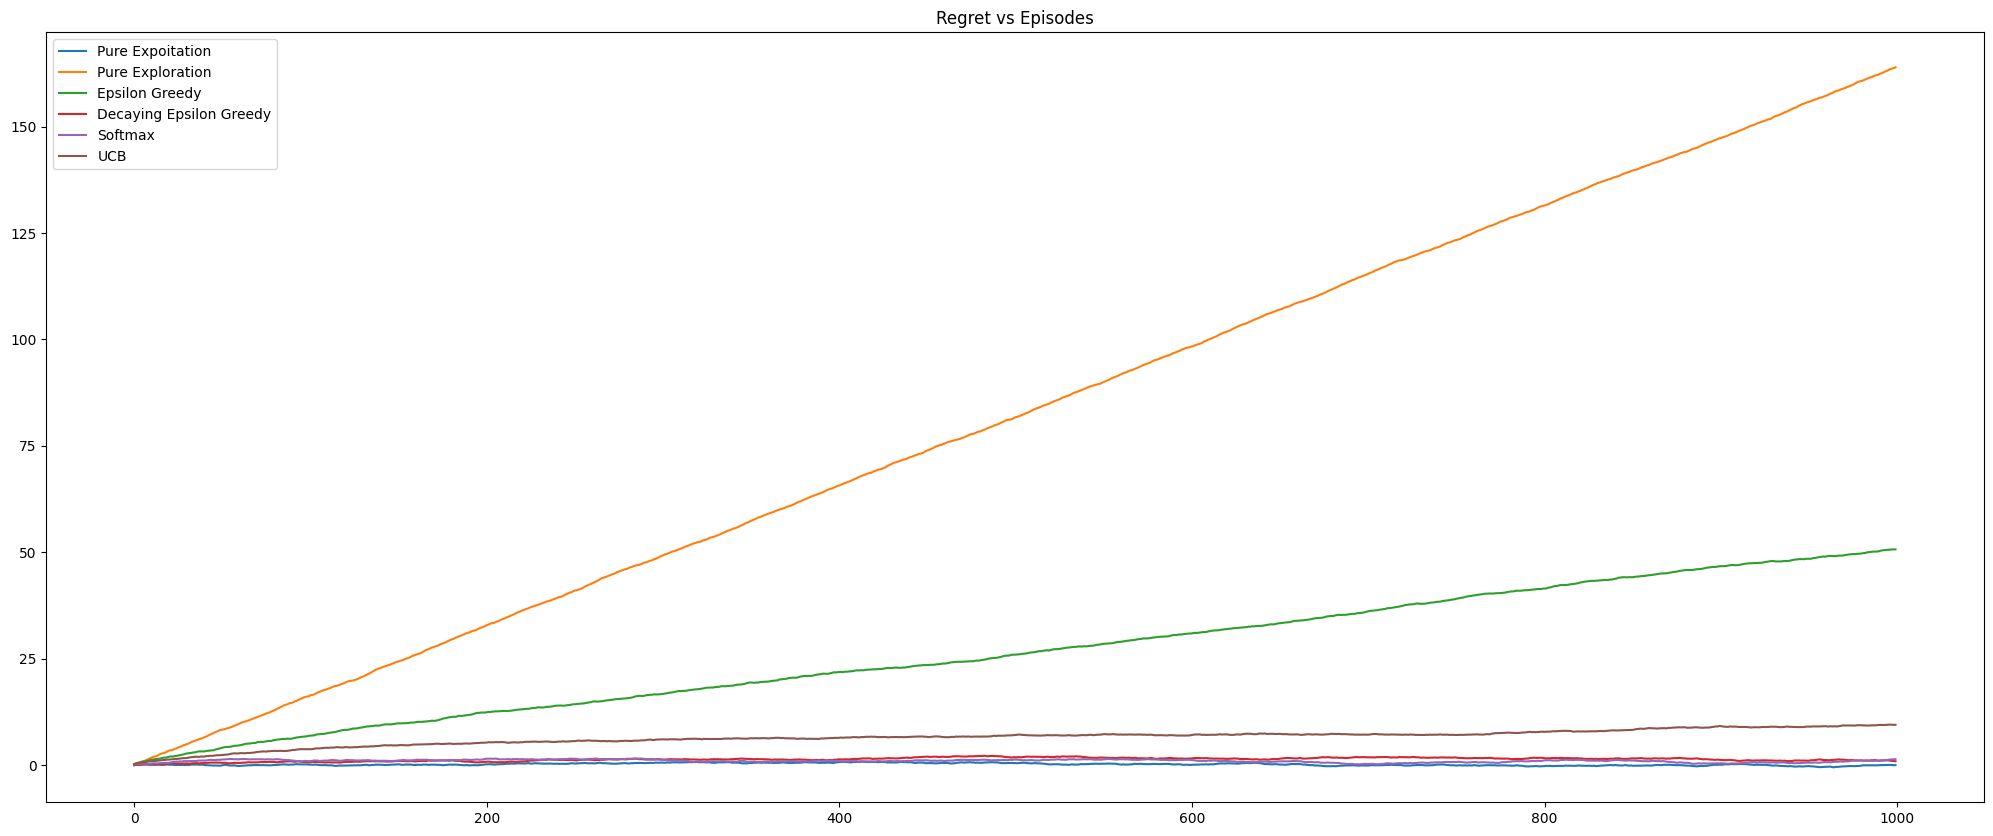

In [21]:
plt.figure(figsize=(25,10))

plt.plot(T, regret1, label = 'Pure Expoitation')
plt.plot(T, regret2, label = "Pure Exploration")
plt.plot(T, regret3, label = "Epsilon Greedy")
plt.plot(T, regret4, label = "Decaying Epsilon Greedy")
plt.plot(T, regret5, label = "Softmax")
plt.plot(T, regret6, label = "UCB")
plt.title("Regret vs Episodes")

plt.legend()

plt.show()

1.8

Plot average rewards vs episodes for each of the 6 agents in the same plot. Basically, for each agent, run 50 instances of 2-armed Bernoulli Bandit environment, run the agent for 1000 episodes; calculate the average reward at each step across all 50 instances and plot the average reward vs episodes. Just to give an example of the plot see the top plot in Figure 2.

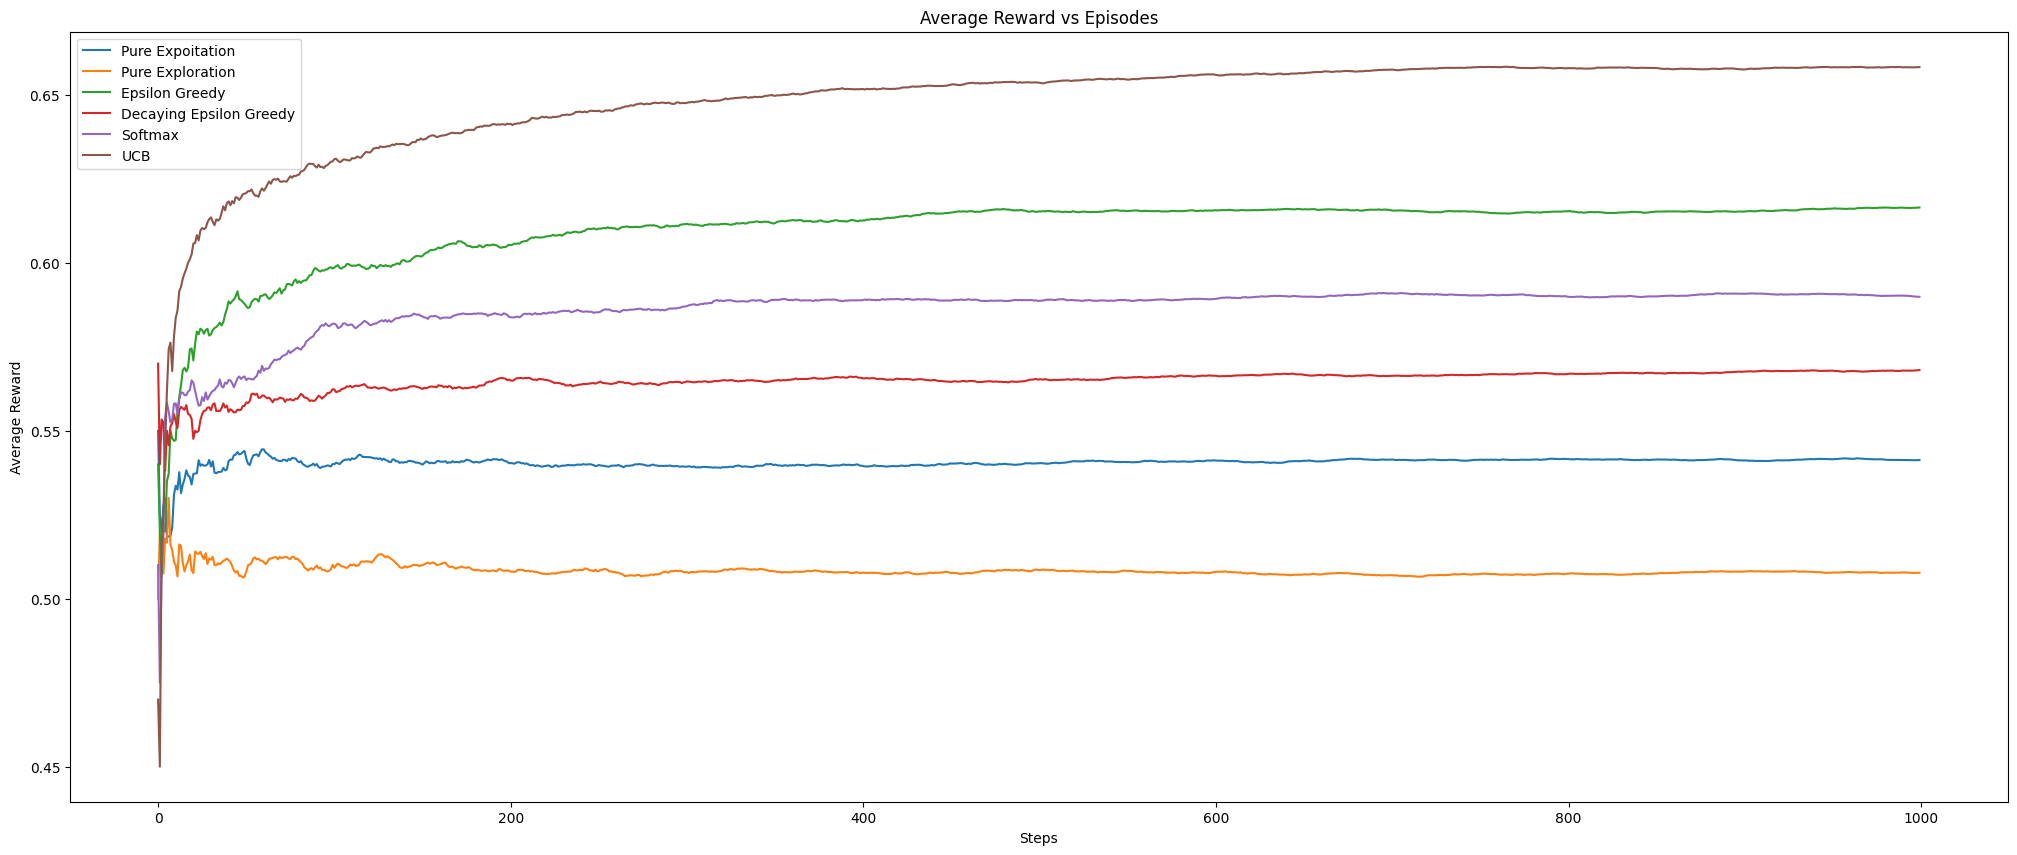

In [22]:
plt.figure(figsize=(25,10))

plt.plot(T, avgr1, label = 'Pure Expoitation')
plt.plot(T, avgr2, label = "Pure Exploration")
plt.plot(T, avgr3, label = "Epsilon Greedy")
plt.plot(T, avgr4, label = "Decaying Epsilon Greedy")
plt.plot(T, avgr5, label = "Softmax")
plt.plot(T, avgr6, label = "UCB")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Episodes")

plt.legend()

plt.show()

1.5

Repeat the same thing as in 1.4 for 10-armed Gaussian Bandit.

In [23]:
environments = []
n=50
for i in range(n):
  environments.append(make('TenArmedGaussianBandit'))

max_time_steps = 1000
max_episodes = 1

R1=np.zeros(shape=(n, max_time_steps))
R2=np.zeros(shape=(n, max_time_steps))
R3=np.zeros(shape=(n, max_time_steps))
R4=np.zeros(shape=(n, max_time_steps))
R5=np.zeros(shape=(n, max_time_steps))
R6=np.zeros(shape=(n, max_time_steps))


OA1=np.zeros(shape=(n, max_time_steps))
OA2=np.zeros(shape=(n, max_time_steps))
OA3=np.zeros(shape=(n, max_time_steps))
OA4=np.zeros(shape=(n, max_time_steps))
OA5=np.zeros(shape=(n, max_time_steps))
OA6=np.zeros(shape=(n, max_time_steps))

regret1 = np.zeros(shape=(n,max_time_steps))
regret2 = np.zeros(shape=(n,max_time_steps))
regret3 = np.zeros(shape=(n,max_time_steps))
regret4 = np.zeros(shape=(n,max_time_steps))
regret5 = np.zeros(shape=(n,max_time_steps))
regret6 = np.zeros(shape=(n,max_time_steps))

avgr1 = np.zeros(shape=(n,max_time_steps))
avgr2 = np.zeros(shape=(n,max_time_steps))
avgr3 = np.zeros(shape=(n,max_time_steps))
avgr4 = np.zeros(shape=(n,max_time_steps))
avgr5 = np.zeros(shape=(n,max_time_steps))
avgr6 = np.zeros(shape=(n,max_time_steps))

for i in range(n):

  for j in range(max_episodes):
    r1 = PureExploitation(environments[i], max_time_steps)
    r2 = PureExploration(environments[i], max_time_steps)
    r3 = EpsilonGreedy(environments[i], max_time_steps, epsilon = 0.3)
    r4 = EpsilonGreedy(environments[i], max_time_steps, epsilon = 0.3, decayType = "exponential", decay_rate=0.7)
    r5 = Softmax(environments[i], max_time_steps, tau = 0.01)
    r6 = UCB(environments[i],  max_time_steps, c=0.8)

    R1[i] = R1[i] + np.array(r1[1])
    R2[i] = R2[i] + np.array(r2[1])
    R3[i] = R3[i] + np.array(r3[1])
    R4[i] = R4[i] + np.array(r4[1])
    R5[i] = R5[i] + np.array(r5[1])
    R6[i] = R6[i] + np.array(r6[1])

    regret1[i,:] = regret1[i,:] + np.array(r1[2])
    regret2[i,:] = regret2[i,:] + np.array(r2[2])
    regret3[i,:] = regret3[i,:] + np.array(r3[2])
    regret4[i,:] = regret4[i,:] + np.array(r4[2])
    regret5[i,:] = regret5[i,:] + np.array(r5[2])
    regret6[i,:] = regret6[i,:] + np.array(r6[2])

    avgr1[i,:] = avgr1[i,:] + np.array(r1[3])
    avgr2[i,:] = avgr2[i,:] + np.array(r2[3])
    avgr3[i,:] = avgr3[i,:] + np.array(r3[3])
    avgr4[i,:] = avgr4[i,:] + np.array(r4[3])
    avgr5[i,:] = avgr5[i,:] + np.array(r5[3])
    avgr6[i,:] = avgr6[i,:] + np.array(r6[3])

    OA1[i,:] = OA1[i,:] + np.array(r1[4])
    OA2[i,:] = OA2[i,:] + np.array(r2[4])
    OA3[i,:] = OA3[i,:] + np.array(r3[4])
    OA4[i,:] = OA4[i,:] + np.array(r4[4])
    OA5[i,:] = OA5[i,:] + np.array(r5[4])
    OA6[i,:] = OA6[i,:] + np.array(r6[4])


R1 = np.mean(R1, axis=0)/max_episodes
R2 = np.mean(R2, axis=0)/max_episodes
R3 = np.mean(R3, axis=0)/max_episodes
R4 = np.mean(R4, axis=0)/max_episodes
R5 = np.mean(R5, axis=0)/max_episodes
R6 = np.mean(R6, axis=0)/max_episodes

regret1 = np.mean(regret1, axis=0)/max_episodes
regret2 = np.mean(regret2, axis=0)/max_episodes
regret3 = np.mean(regret3, axis=0)/max_episodes
regret4 = np.mean(regret4, axis=0)/max_episodes
regret5 = np.mean(regret5, axis=0)/max_episodes
regret6 = np.mean(regret6, axis=0)/max_episodes

avgr1 = np.mean(avgr1, axis=0)/max_episodes
avgr2 = np.mean(avgr2, axis=0)/max_episodes
avgr3 = np.mean(avgr3, axis=0)/max_episodes
avgr4 = np.mean(avgr4, axis=0)/max_episodes
avgr5 = np.mean(avgr5, axis=0)/max_episodes
avgr6 = np.mean(avgr6, axis=0)/max_episodes

OA1 = np.mean(OA1, axis=0)/max_episodes
OA2 = np.mean(OA2, axis=0)/max_episodes
OA3 = np.mean(OA3, axis=0)/max_episodes
OA4 = np.mean(OA4, axis=0)/max_episodes
OA5 = np.mean(OA5, axis=0)/max_episodes
OA6 = np.mean(OA6, axis=0)/max_episodes

T = np.arange(max_time_steps)


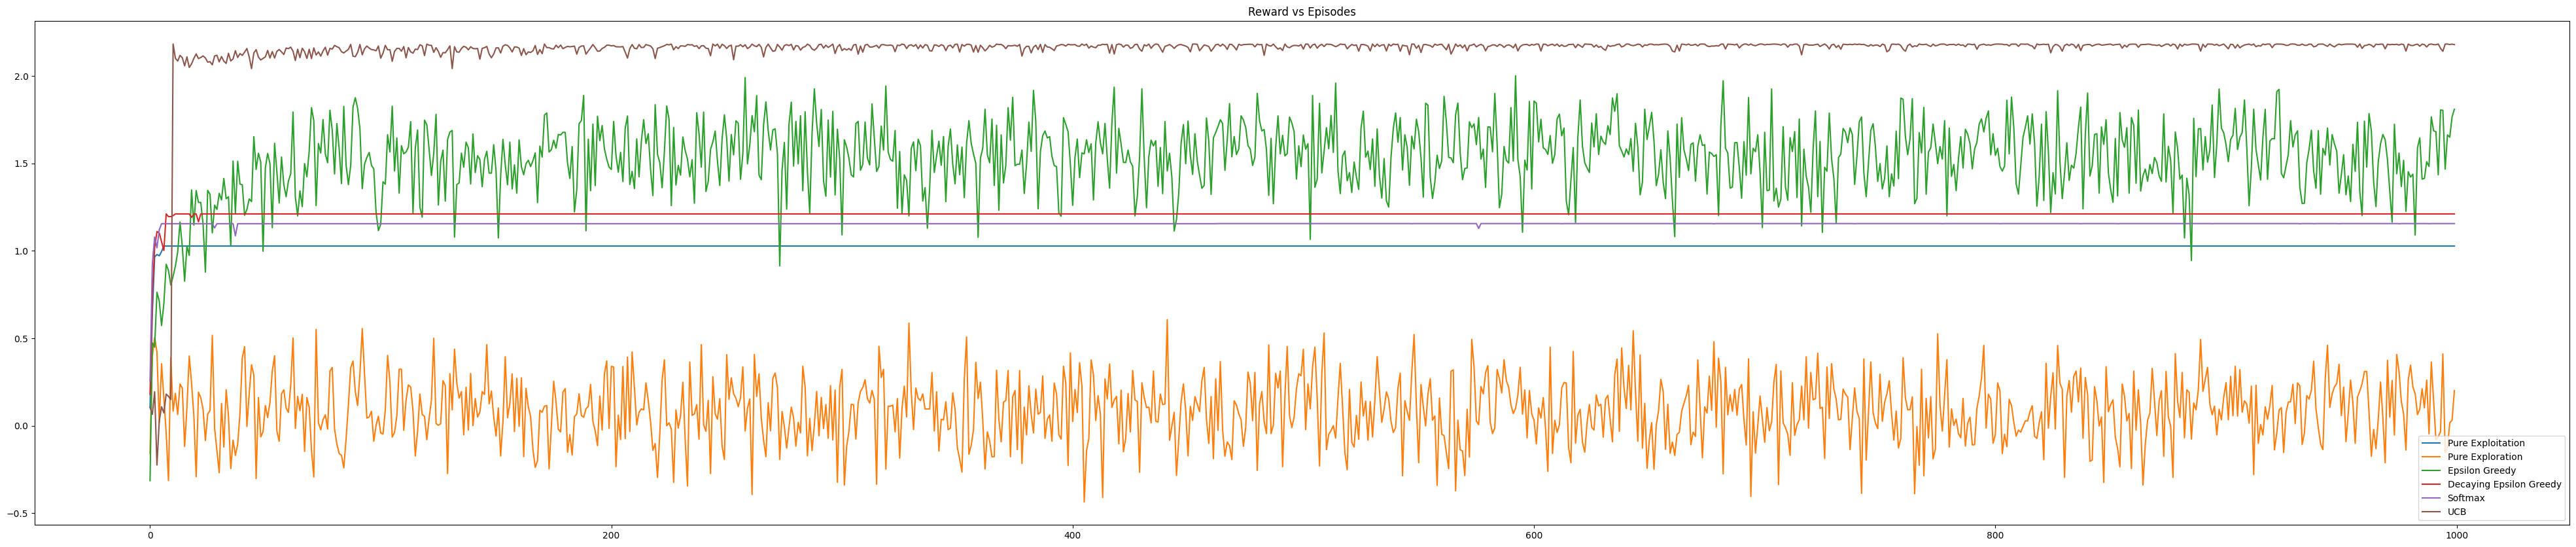

In [24]:
plt.figure(figsize=(50,10))

plt.plot(T, R1, label = 'Pure Exploitation')
plt.plot(T, R2, label = "Pure Exploration")
plt.plot(T, R3, label = "Epsilon Greedy")
plt.plot(T, R4, label = "Decaying Epsilon Greedy")
plt.plot(T, R5, label = "Softmax")
plt.plot(T, R6, label = "UCB")
plt.title("Reward vs Episodes")

plt.legend()

plt.show()

1.7

Repeat the same thing as in 1.6 for 10-armed Gaussian Bandit.


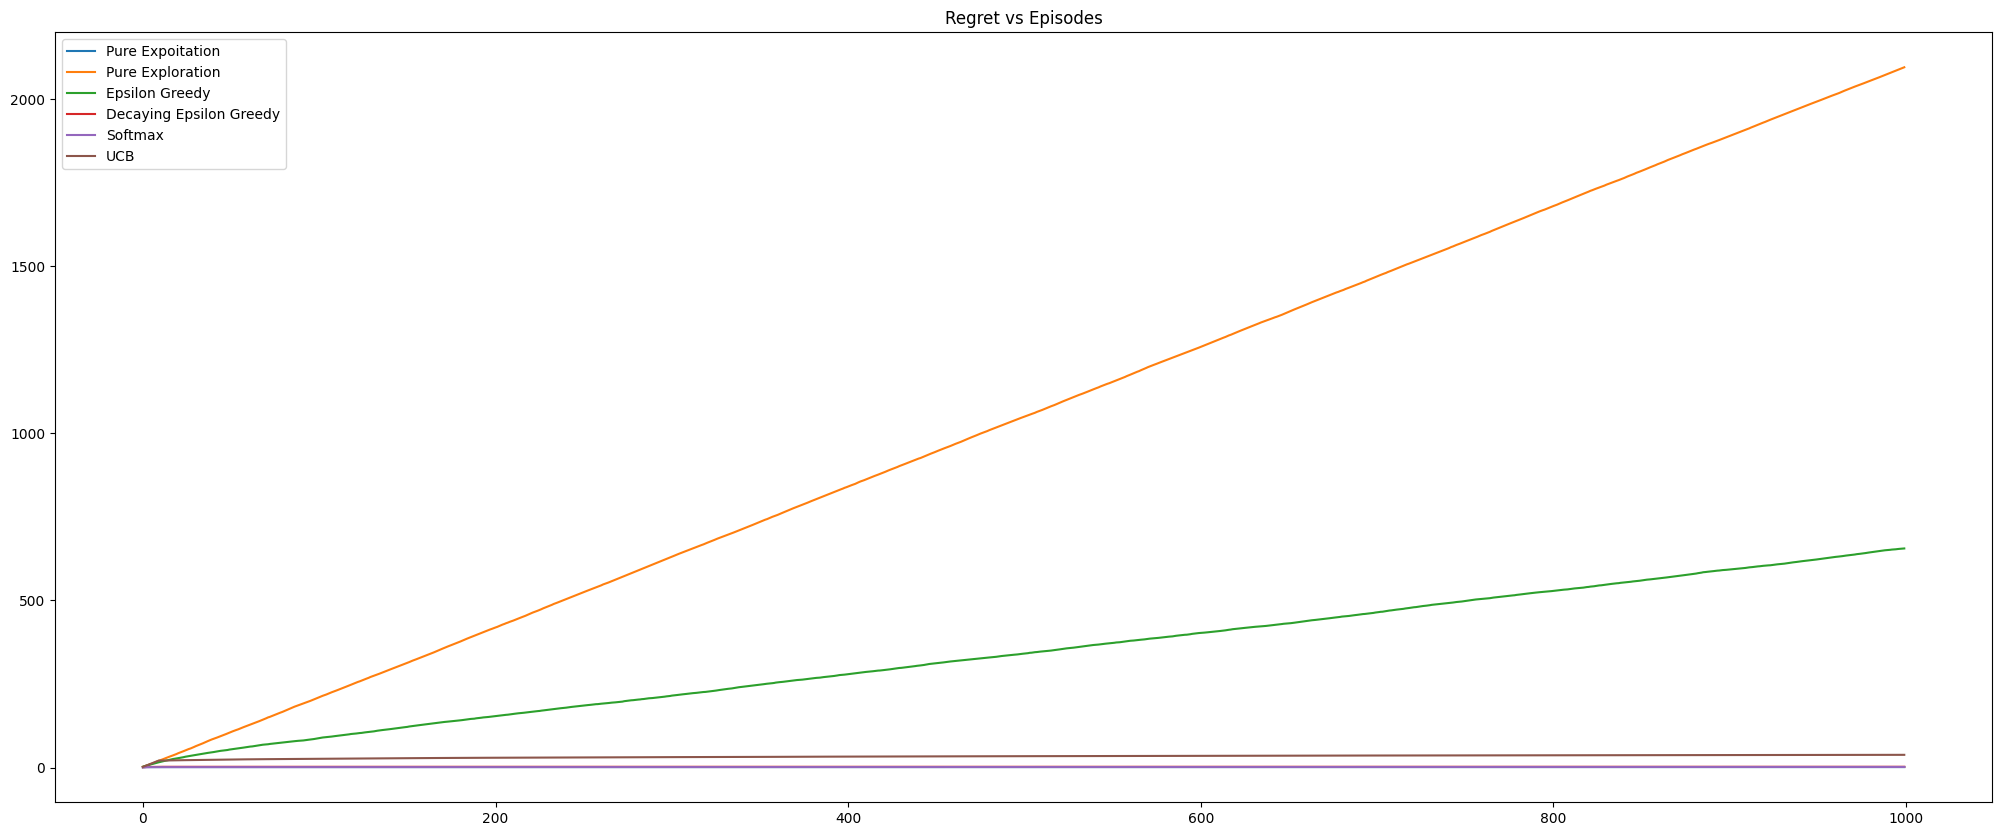

In [25]:
plt.figure(figsize=(25,10))

plt.plot(T, regret1, label = 'Pure Expoitation')
plt.plot(T, regret2, label = "Pure Exploration")
plt.plot(T, regret3, label = "Epsilon Greedy")
plt.plot(T, regret4, label = "Decaying Epsilon Greedy")
plt.plot(T, regret5, label = "Softmax")
plt.plot(T, regret6, label = "UCB")
plt.title("Regret vs Episodes")

plt.legend()

plt.show()

1.10

Repeat the things in 1.8 and 1.9 in Ten-Armed Gaussian Bandit

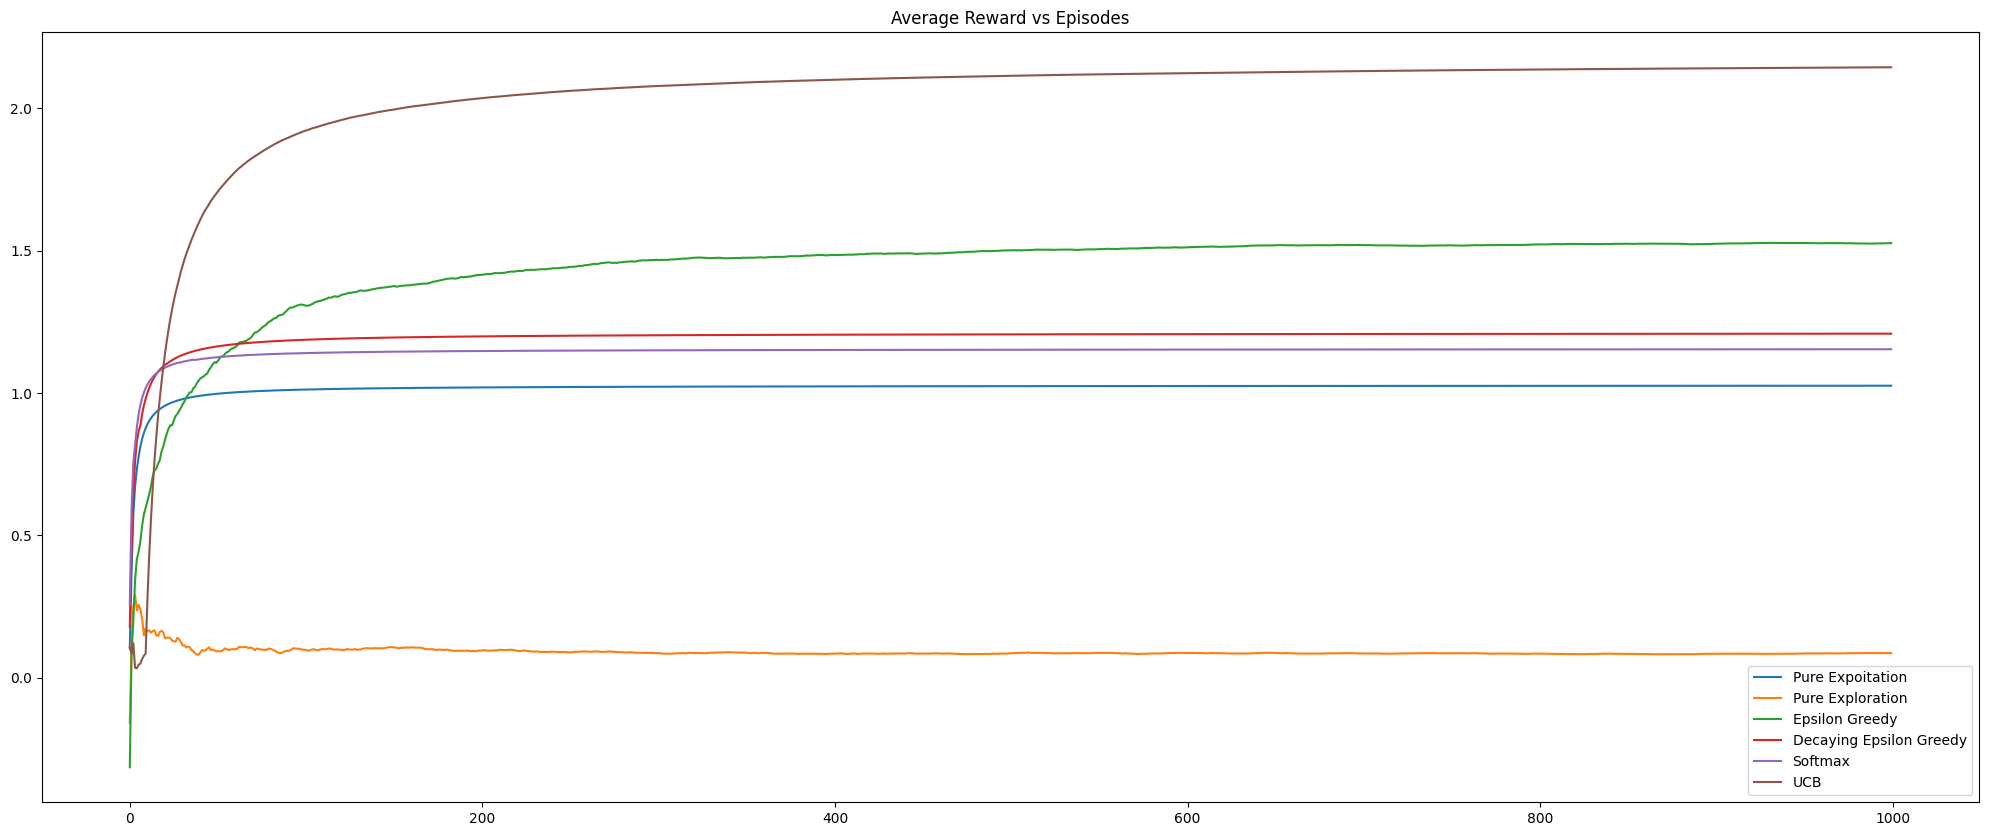

In [26]:
plt.figure(figsize=(25,10))

plt.plot(T, avgr1, label = 'Pure Expoitation')
plt.plot(T, avgr2, label = "Pure Exploration")
plt.plot(T, avgr3, label = "Epsilon Greedy")
plt.plot(T, avgr4, label = "Decaying Epsilon Greedy")
plt.plot(T, avgr5, label = "Softmax")
plt.plot(T, avgr6, label = "UCB")

plt.title("Average Reward vs Episodes")
plt.legend()

plt.show()

1.9

Plot % Optimal Action vs episodes for each of the 6 agents in the same plot. Basically, for each agent,
run 50 instances of 2-armed Bernoulli Bandit environment, run the agent for 1000 episodes; calculate on
an average (across 50 instances) for each episode how often (in %) the agent selects the optimal action
and plot % Optimal Action vs episodes. Just to give an example of the plot see the bottom plot in Figure
